# Unsupervised Machine Learning Techniques for Linguistic Research

First, overview of machine learning and supervised vs unsupervised techniques.

This tutorial will focus on each the following unsupervised machine learning techniques:

1. K-means Clustering - vowel categories (Sandoval et al., 2013), language profiles (Rysiewicz, 2008)
2. Principal Component Analysis (PCA, Dimensionality Reduction) - matched guise (Newman et al., 2008)

Two extremely useful Python packages that will be used in this tutorial are `scipy` and `scikit-learn`. These packages are often used in machine learning techniques.

Import the following libraries:

In [1]:
import pandas as pd # allows you to open .csv files into Python

# libraries for plotting
import matplotlib.pyplot as plt # allows you to plot in Python
# allows for plotting inline
%matplotlib inline

# k-means clustering
from sklearn.cluster import KMeans # KMeans algorith

# pca
from sklearn.decomposition import PCA # PCA algorithm

### 1. K-means Clustering

K-means clustering is a simple method for sorting unlabeled data. The technique works with k number of centroids and assigns every data point in the data set to the nearest centroid. The centroids then shift to take the place of the new centroid of the generated cluster, then every data point is once again assigned to the cluster of the nearest centroid. The process is iterative and repeats until the sum of squared distances within clusters is minimized. 

![k-means animation](https://media.giphy.com/media/12vVAGkaqHUqCQ/giphy.gif)

(Source: https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/)

#### Parameters of the k-means algorithm

Common parameters for the algorithm include:

- `init`; determines how the initial cluster centroids are chosen, `"k-means++"` is the default and chooses the centroids 'smartly', speeding up the process
- `n_clusters`; the number of cluster centroids, can be selected based on domain knowledge, or by best-fit methods (described below)
- `n_init`; the number of iterations to run through with different centroid starting points, default is 10

See (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) for more details.

#### Determining the number of clusters

The number of clusters can either by determined by the researcher, based on domain knowledge, or can be decided via a variety of methods. Here, the "elbow method" will be shown, but another value of k can also be used to fit the model.

For this tutorial, the dataset `blp_scores.csv` can be used for practice. The data set contains raw responses to the Bilingual Language Profile (BLP) survey (Gertken et al., 2014), with information from two separate languages about the following four categories:

- Attitudes towards the language
- History with the language
- Proficiency in the language
- Use of the language

We can use k-means clustering to group participants according to their similarity of responses. 

Import the dataset and then run the following code chunk to calculate the sum of squared distances produced by a range of k-values, 0-10:

In [3]:
# import .csv as dataframe
blp = pd.read_csv("data/blp_scores.csv")
blp.head()

,Participant,Attitude_Spanish,Attitude_Catalan,History_Spanish,History_Catalan,Proficiency_Spanish,Proficiency_Catalan,Use_Spanish,Use_Catalan
0,p1,20,24,86,96,23,23,14,35
1,p2,20,24,87,97,18,24,1,44
2,p3,20,24,96,115,19,24,10,36
3,p4,12,12,81,120,19,24,17,33
4,p5,22,23,104,84,19,24,32,18


Next, we can normalize the values by dividing each column by the total possible points.

- Attitude - 24 points max
- History - 180 points
- Proficiency - 24 points max
- Use - 50 points max

In [5]:
blp['Attitude_Spanish'] = blp['Attitude_Spanish']/24
blp['Attitude_Catalan'] = blp['Attitude_Catalan']/24
blp['History_Spanish'] = blp['History_Spanish']/180
blp['History_Catalan'] = blp['History_Catalan']/180
blp['Proficiency_Spanish'] = blp['Proficiency_Spanish']/24
blp['Proficiency_Catalan'] = blp['Proficiency_Catalan']/24
blp['Use_Spanish'] = blp['Use_Spanish']/50
blp['Use_Catalan'] = blp['Use_Catalan']/50
blp.head()

,Participant,Attitude_Spanish,Attitude_Catalan,History_Spanish,History_Catalan,Proficiency_Spanish,Proficiency_Catalan,Use_Spanish,Use_Catalan
0,p1,0.833333,1.000000,0.477778,0.533333,0.958333,0.958333,0.28,0.70
1,p2,0.833333,1.000000,0.483333,0.538889,0.750000,1.000000,0.02,0.88
2,p3,0.833333,1.000000,0.533333,0.638889,0.791667,1.000000,0.20,0.72
3,p4,0.500000,0.500000,0.450000,0.666667,0.791667,1.000000,0.34,0.66
4,p5,0.916667,0.958333,0.577778,0.466667,0.791667,1.000000,0.64,0.36


Before the best value of k can be determined with the elbow method, the 'Participant' column needs to be dropped, since k-means clustering only works with numeric data.

In [7]:
# drop the participant column from data set
participant_clustering = blp.drop('Participant', 1)

# calculate sum of squared distances over range of k-values
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(participant_clustering) 
    Sum_of_squared_distances.append(km.inertia_)

Next, plot the relationship between the k-value and its associated sum of squared distances. Because the sum of squared distance will be at the lowest when the k-value is equal to the number of points in the data set, you can't select the k-value that minimizes the sum of squared distance. However, the k-value on the graph below at the "elbow" of the curve is the value that will minimize the sum of squared distance while still producing a meaningful clustering.

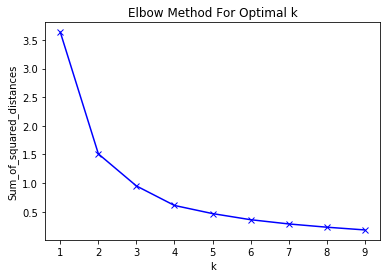

In [8]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From the plot above, the best value of k for this data set is 2. Now, this value can be plugged into the algorithm and the data can be clustered.

In [9]:
# set the parameters for the k-means algorithm
k_means = KMeans(init = "k-means++", n_clusters = 2, n_init = 12)

# fit the algorithm to the dataframe
k_means.fit(participant_clustering)

# create an array called `k_means_labels` which contains the cluster label for each row in the dataframe
k_means_labels = k_means.labels_
k_means_labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0])

In [10]:
# create an array called `k_means_cluster_centers` which contains the centroid of each cluster
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[0.90625   , 0.875     , 0.55555556, 0.42222222, 0.875     ,
        0.92708333, 0.61      , 0.225     ],
       [0.66987179, 0.95833333, 0.40982906, 0.57136752, 0.84935897,
        0.96474359, 0.14153846, 0.83076923]])

Now, the array of cluster labels can be attached to the original dataframe for future reference.

In [11]:
blp.insert(1, 'Cluster Labels', k_means_labels)
blp.head()

,Participant,Cluster Labels,Attitude_Spanish,Attitude_Catalan,History_Spanish,History_Catalan,Proficiency_Spanish,Proficiency_Catalan,Use_Spanish,Use_Catalan
0,p1,1,0.833333,1.000000,0.477778,0.533333,0.958333,0.958333,0.28,0.70
1,p2,1,0.833333,1.000000,0.483333,0.538889,0.750000,1.000000,0.02,0.88
2,p3,1,0.833333,1.000000,0.533333,0.638889,0.791667,1.000000,0.20,0.72
3,p4,1,0.500000,0.500000,0.450000,0.666667,0.791667,1.000000,0.34,0.66
4,p5,0,0.916667,0.958333,0.577778,0.466667,0.791667,1.000000,0.64,0.36


Lastly, take the mean of each feature group for each cluster. This data, along with domain knowledge, will help to classify the clusters according to their distinguishing differences.

In [12]:
blp.groupby('Cluster Labels').mean()

,Attitude_Spanish,Attitude_Catalan,History_Spanish,History_Catalan,Proficiency_Spanish,Proficiency_Catalan,Use_Spanish,Use_Catalan
Cluster Labels,,,,,,,,
0,0.906250,0.875000,0.555556,0.422222,0.875000,0.927083,0.610000,0.225000
1,0.669872,0.958333,0.409829,0.571368,0.849359,0.964744,0.141538,0.830769


Based on the above results of clustering, we could distinguish between participants according to their use of Spanish vs. Catalan, as this is the greatest difference between the clusters. 

For more examples of linguistic applications of k-means clustering, see Rysiewicz (2008) and Sandoval et al. (2013).

### 2. Principal Component Analysis (PCA)

varimax rotation?

---
### References
Gertken, L. M., Amengual, M., & Birdsong, D. (2014). Assessing language dominance with the bilingual language profile. Measuring L2 proficiency: Perspectives from SLA, 208-225.

Newman, M., Trenchs‐Parera, M., & Ng, S. (2008). Normalizing bilingualism: The effects of the Catalonian linguistic normalization policy one generation after 1. Journal of Sociolinguistics, 12(3), 306-333.

Rysiewicz, J. (2008). Cognitive profiles of (un) successful FL learners: A cluster analytical study. The Modern Language Journal, 92(1), 87-99.

Sandoval, S., Berisha, V., Utianski, R. L., Liss, J. M., & Spanias, A. (2013). Automatic assessment of vowel space area. The Journal of the Acoustical Society of America, 134(5), EL477-EL483.